Accuracy of Decision Tree on winequality-red: 0.7875
Accuracy of Decision Tree on winequality-white: 0.7816326530612245


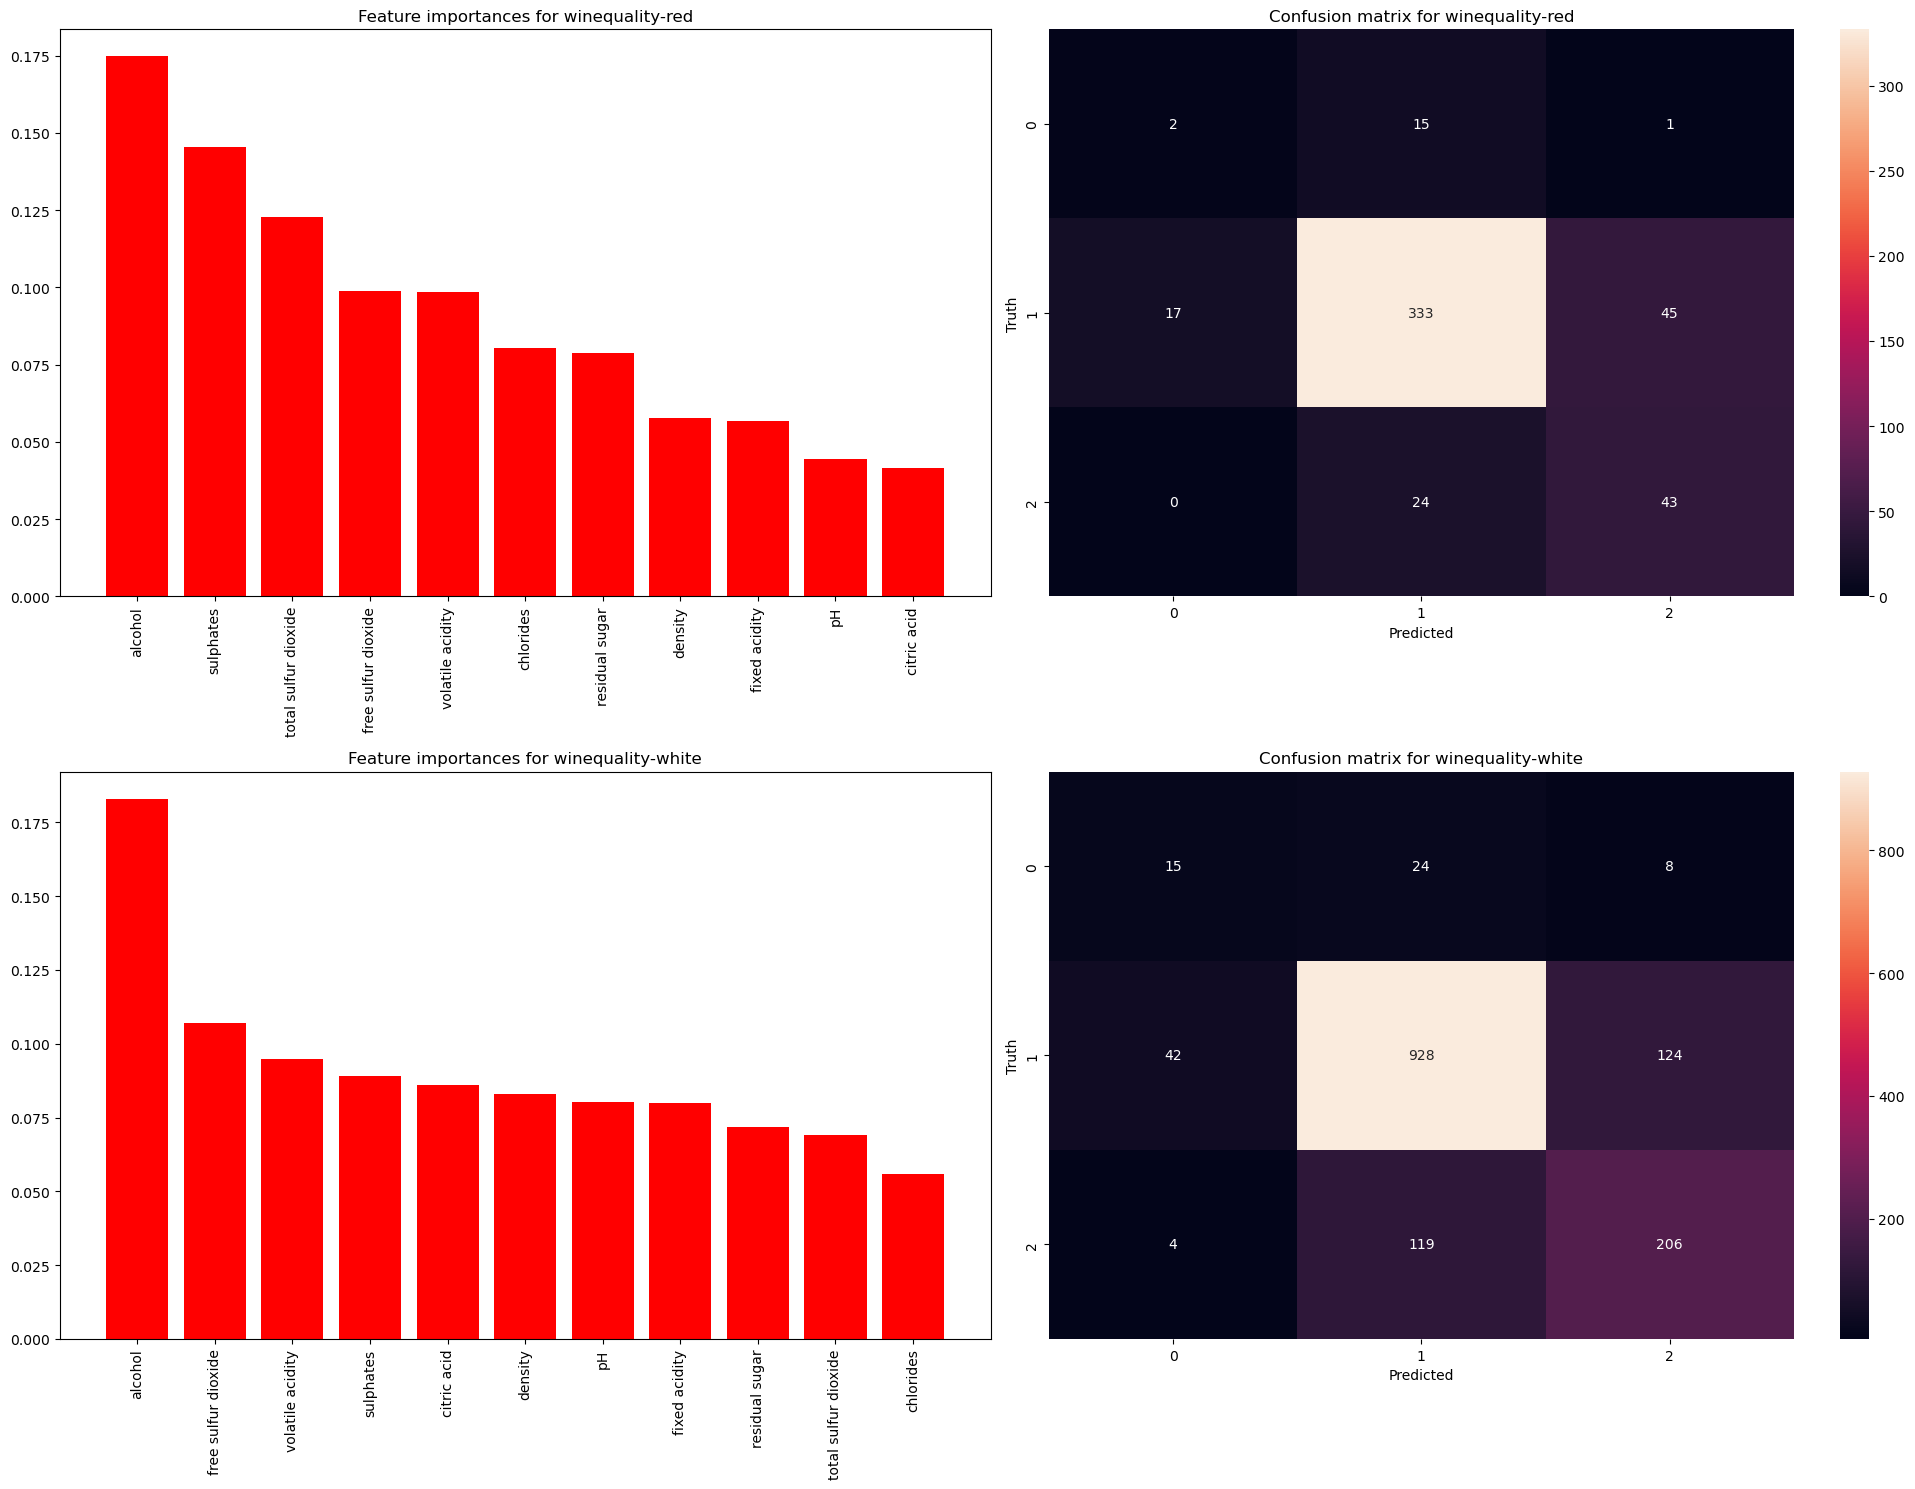

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import DataHandler as dh
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


datasets = dh.read_data("data/full")

fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of Decision Tree on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()

The accuracy is high. The classifier is really good at predicting the quality of the wine. 

We can also see that importance of the features in the model. The most important feature is alcohol, followed by sulphates and volatile acidity for Red Wine. The least important feature is free sulfur dioxide.

In the case of White Wine, the most important feature is alcohol, followed by Volatile acidity and Free sulfur dioxide. The least important feature is sulphates.

The confusion matrix shows that the classifier classified most of the wine correctly. However we clearly can se here (as well as in visualization of the data) that the biggest group is the for quality from 5 to 7. The same groups is also the biggest in terms of quantity in the datasets.  

# Test with only rank 1 features

The following test is only with rank 1 features which were chosen with RFE (Recursive Feature Elimination). The features were chosen with the following code:
- Red: [`alcohol`, `density`, `sulphates`, `total sulfur dioxide`, `volatile acidity`]
- White: [`alcohol`, `density`, `free sulfur dioxide`, `residual sugar` ,`total sulfur dioxide`]


Accuracy of Decision Tree on winequality-red: 0.7958333333333333
Accuracy of Decision Tree on winequality-white: 0.7517006802721088


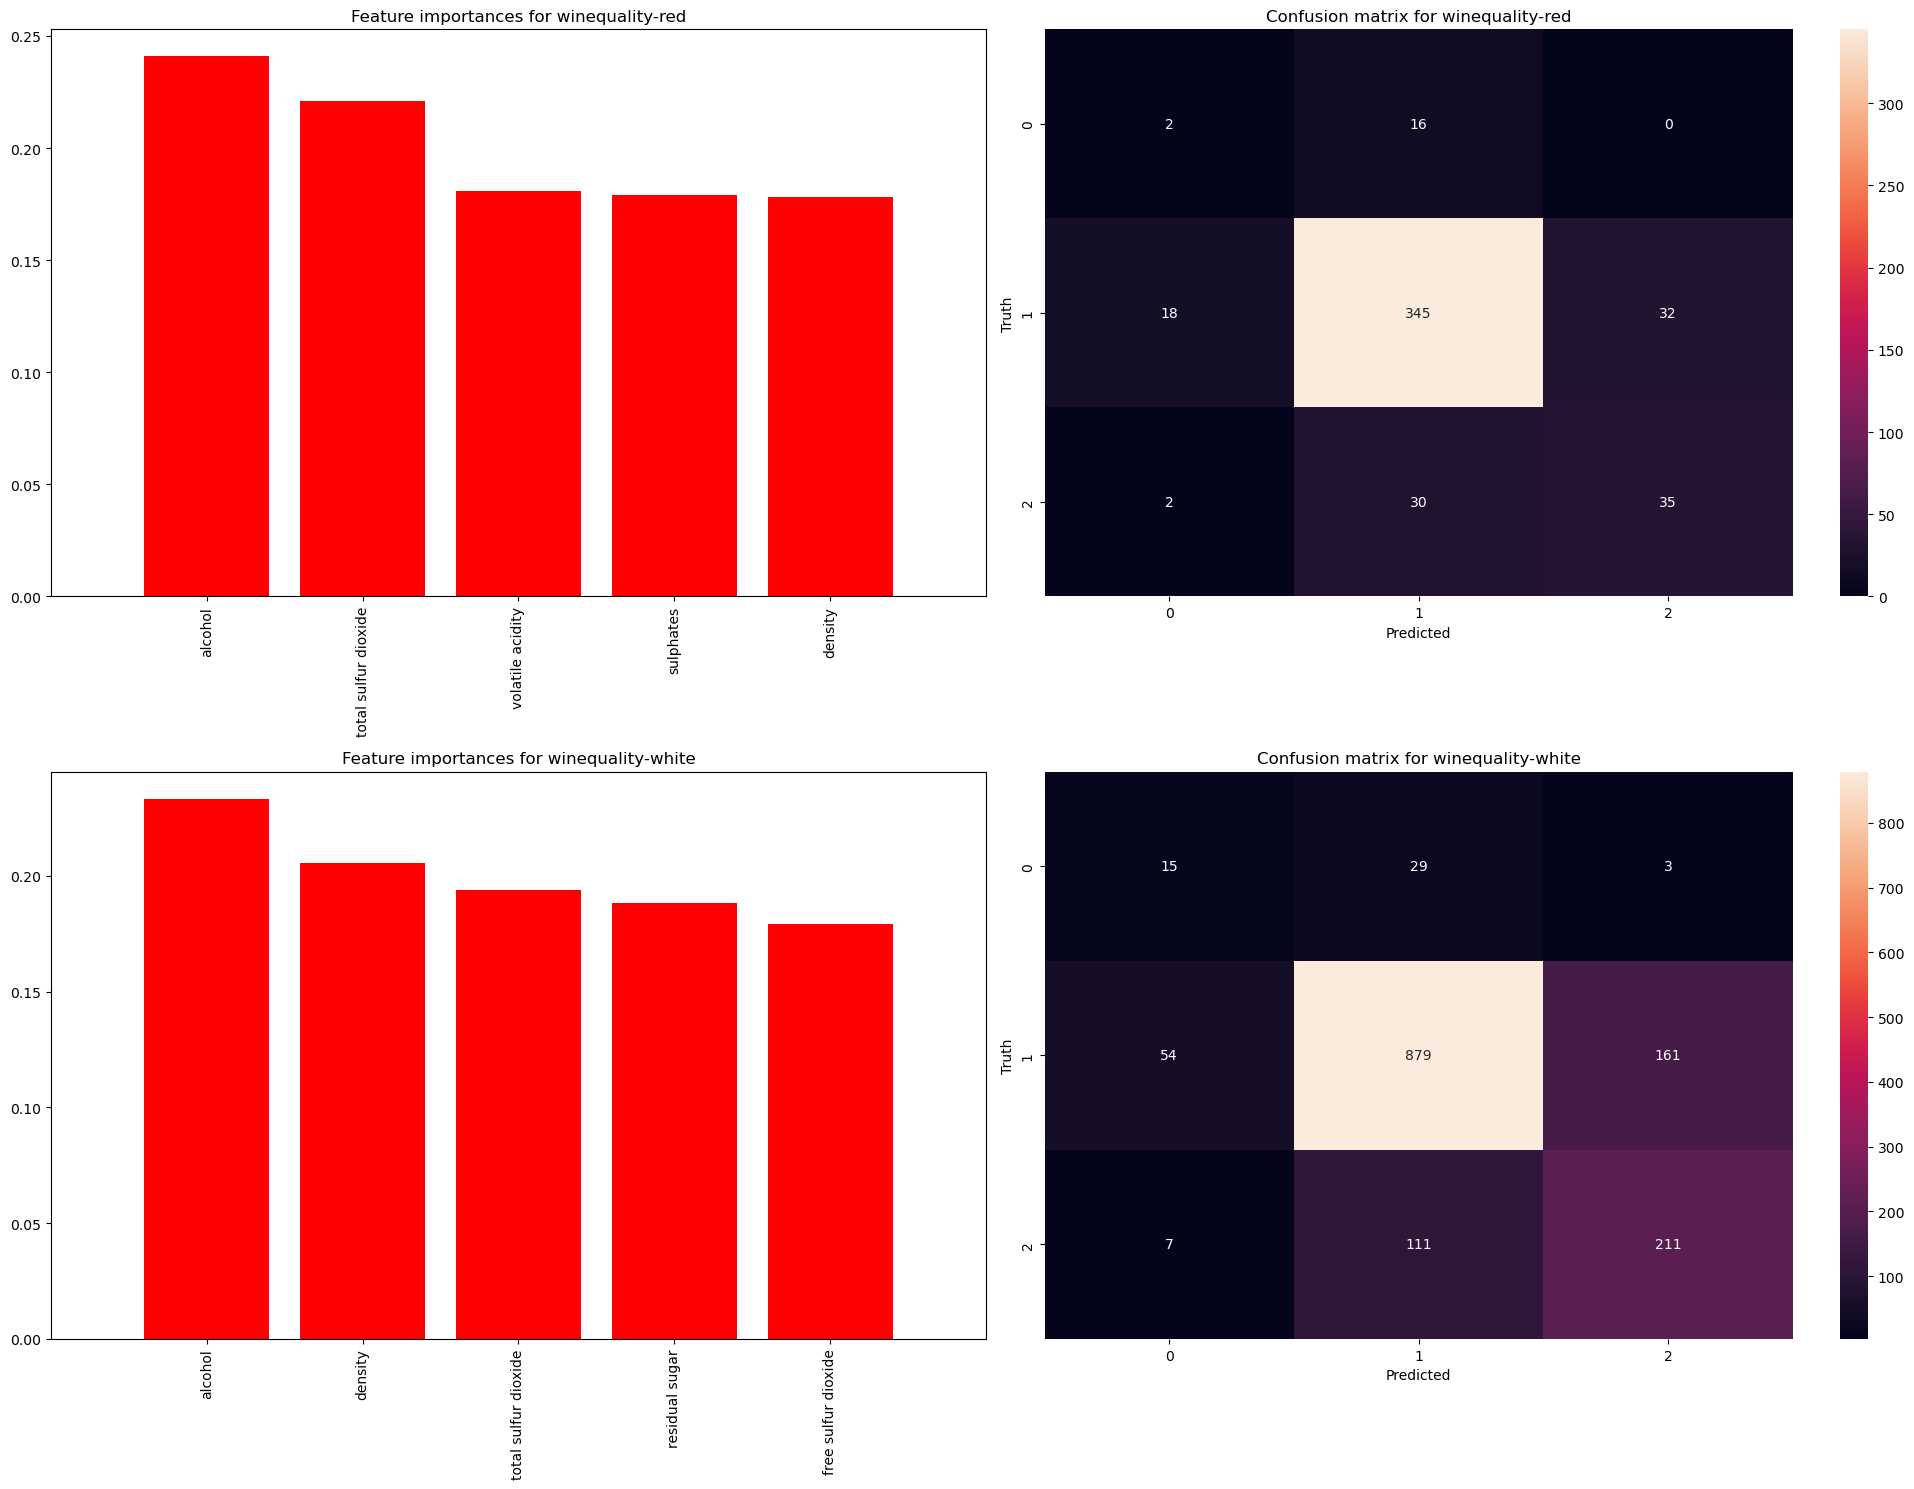

In [15]:
fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    if dataset_name == "winequality-red":
        selected_columns = ['alcohol', 'density', 'sulphates', 'total sulfur dioxide', 'volatile acidity']
    elif dataset_name == "winequality-white":
        selected_columns = ['alcohol', 'density', 'free sulfur dioxide', 'residual sugar' ,'total sulfur dioxide']
    X = df[selected_columns]

    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of Decision Tree on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()
plt.show()

After cutting only to the features that are important for the classifier, we can see that the accuracy is still high. The accuracy did not change much. Unfortunately, the way the data is distributed, it is hard to say if the classifier is really good or not. The accuracy is high, but the data is not balanced. The classifier is good at predicting the quality of the wine, but it is not good at predicting the quality of the wine that is not in the middle range.

# Test with dataset with balanced data (SMOTE method)

Now we will try to balance the data with SMOTE method. We will still consider only rank 1 features. 


Accuracy of Decision Tree on winequality-red: 0.8535353535353535
Accuracy of Decision Tree on winequality-white: 0.8285714285714286


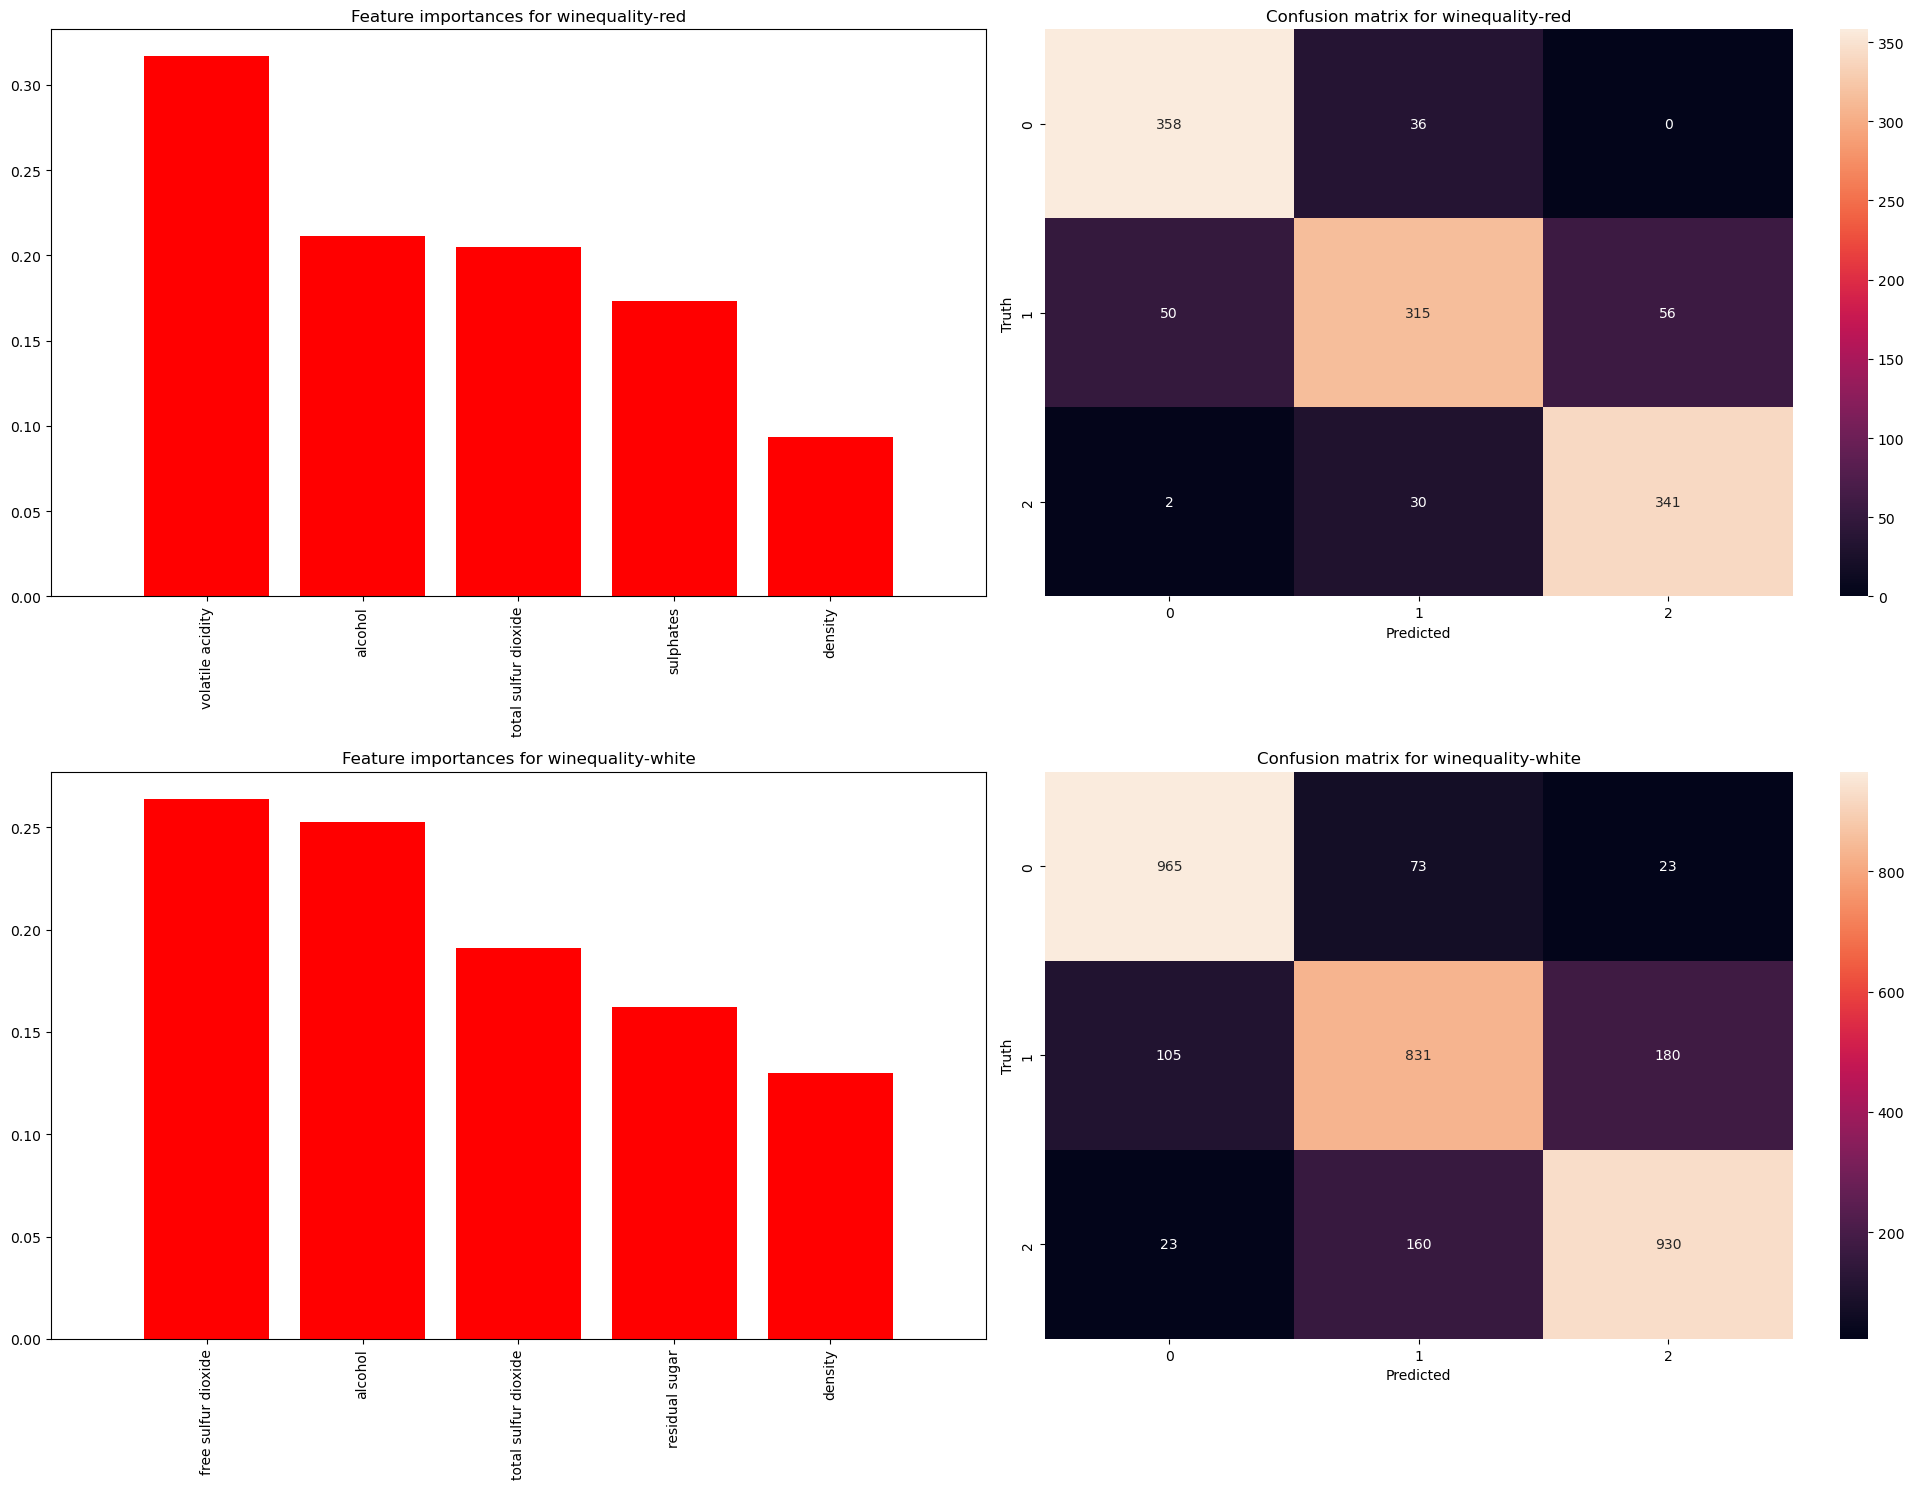

In [16]:
from imblearn.over_sampling import SMOTE

fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    if dataset_name == "winequality-red":
        selected_columns = ['alcohol', 'density', 'sulphates', 'total sulfur dioxide', 'volatile acidity']
    elif dataset_name == "winequality-white":
        selected_columns = ['alcohol', 'density', 'free sulfur dioxide', 'residual sugar' ,'total sulfur dioxide']
    X = df[selected_columns]

    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    sm = SMOTE(random_state=42)
    X, y = sm.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of Decision Tree on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()
plt.show()

We defeniately can see that the accuracy is higher as well as the confusion matrix looks better. Accuracy around 0.8 is really good. The classifier is good at predicting the quality of the wine. The model seems to be working well. 

# Test with dataset made in RandomRemove.ipynb (Explaination in the file) 

Now we will try to use datasets (created before in RandomRemove.ipynb and explained there): 
- with removed rows (10%, 20%, 30$)
- with resotred rows (10%, 20%, 30$)

We will consider all features. Mostly because cutting the features to only rank 1 with also smaller dataset would not be good for the classifier.

## Removed rows

Accuracy of Decision Tree on white_wine_30: 0.75
Accuracy of Decision Tree on white_wine_20: 0.7129629629629629
Accuracy of Decision Tree on red_wine_10: 0.75
Accuracy of Decision Tree on red_wine_30: 0.6666666666666666
Accuracy of Decision Tree on red_wine_20: 0.8048780487804879
Accuracy of Decision Tree on white_wine_10: 0.7139479905437353


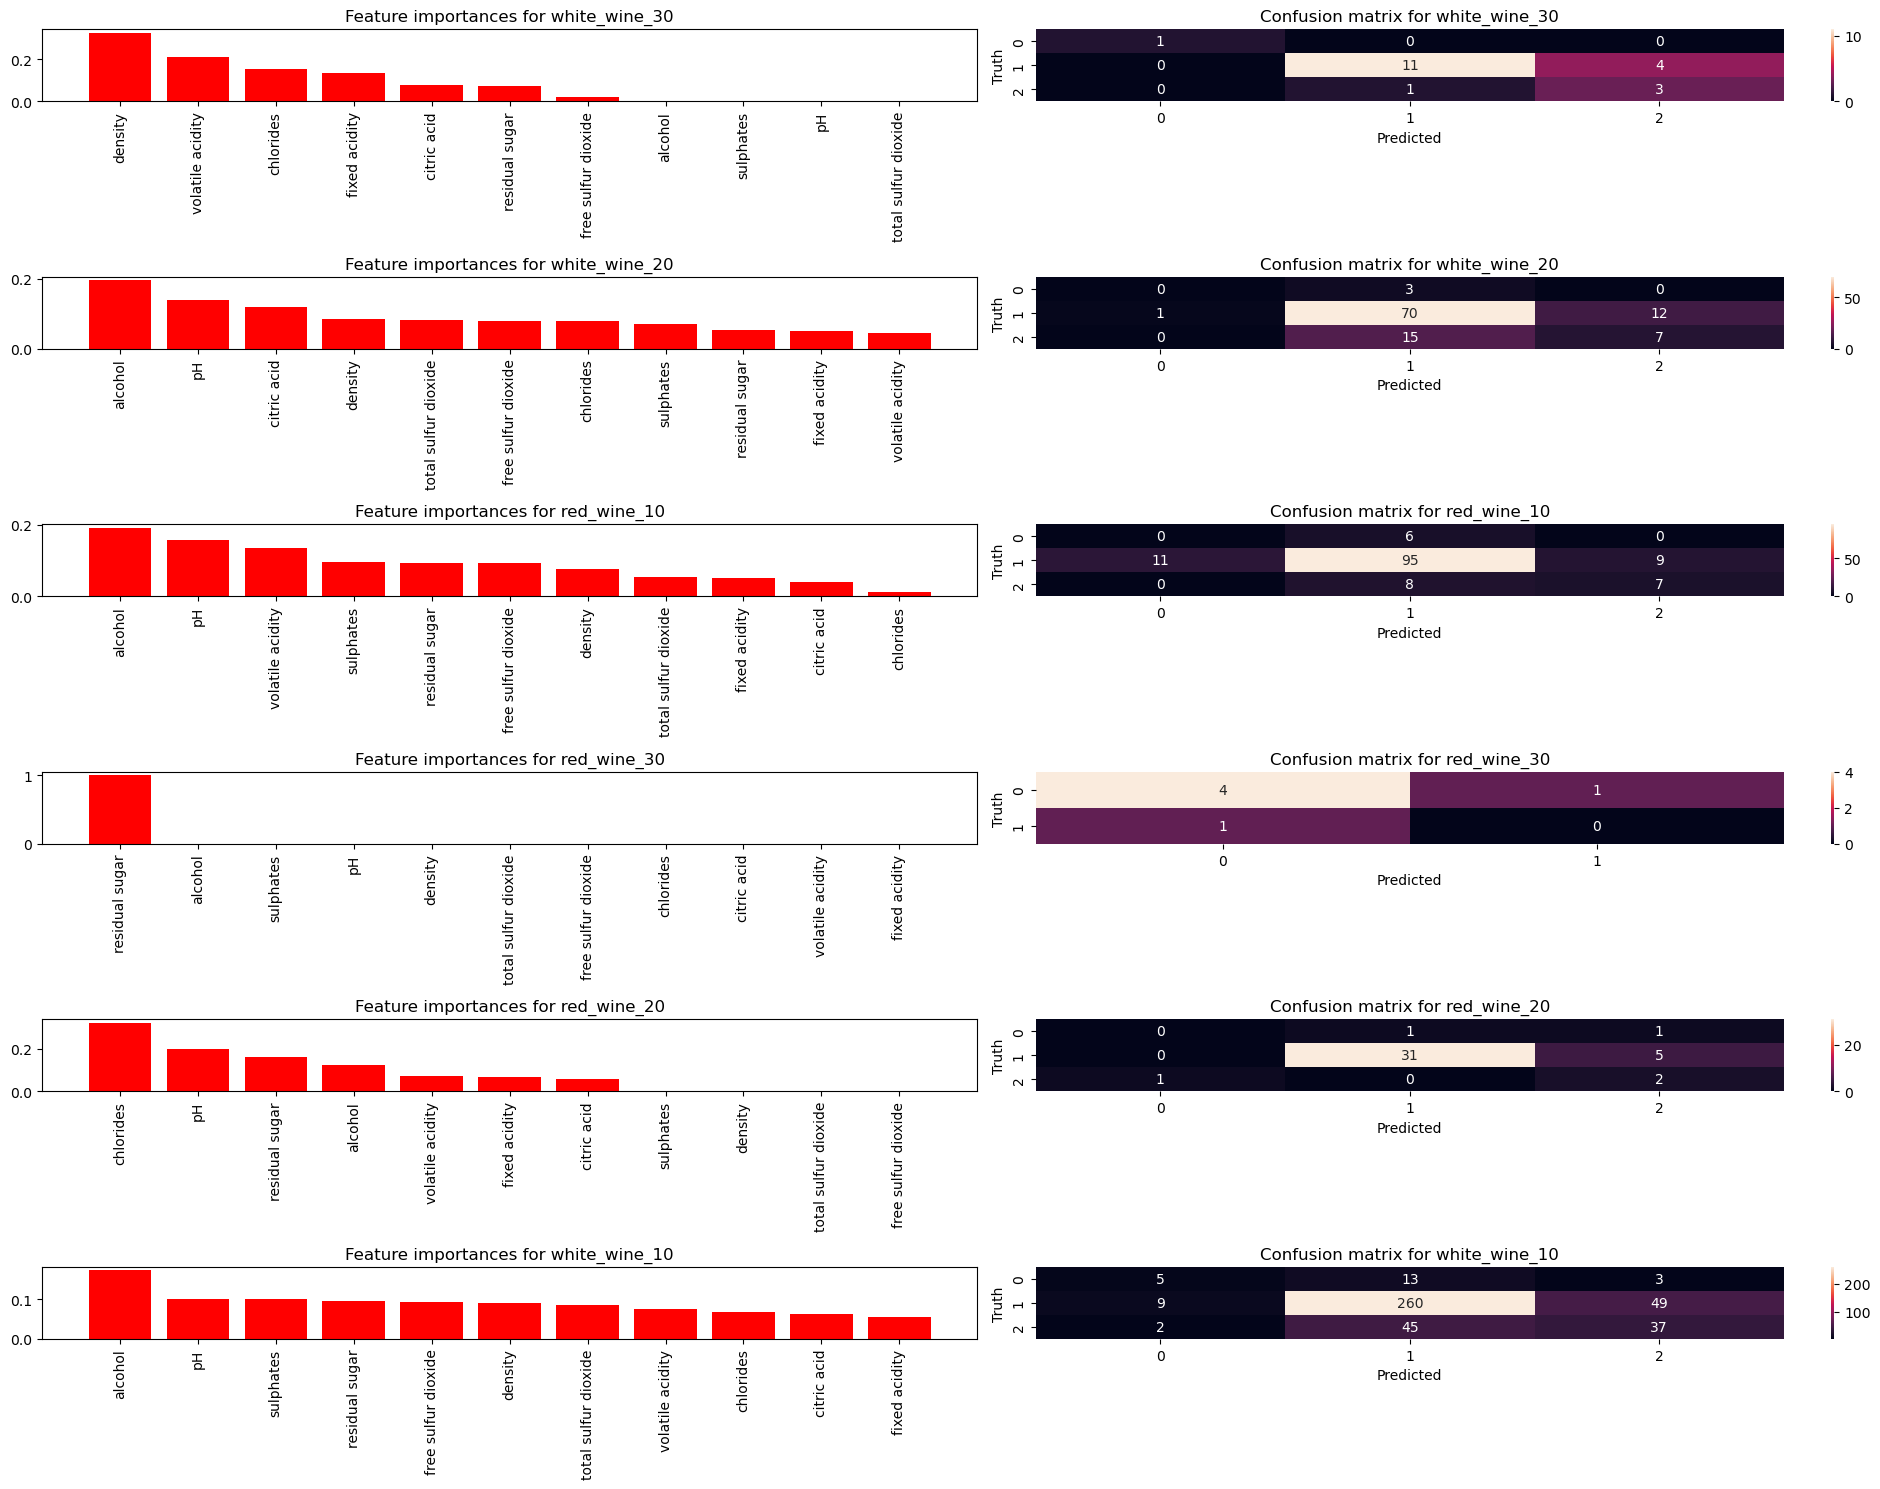

In [17]:
warnings.filterwarnings('ignore', category=UserWarning)


datasets = dh.read_data("data/removed")

fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of Decision Tree on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()

White:
- Accuracy of Decision Tree on white_wine_30: 0.75
- Accuracy of Decision Tree on white_wine_20: 0.7129629629629629
- Accuracy of Decision Tree on white_wine_10: 0.7139479905437353

Red:
- Accuracy of Decision Tree on red_wine_30: 0.6666666666666666
- Accuracy of Decision Tree on red_wine_20: 0.8048780487804879
- Accuracy of Decision Tree on red_wine_10: 0.75

Expected results. With less data, the accuracy is lower. The classifier is not as good as before. Also we can see in confusion matrixes that that some groups dont have even one representative. 
In example of white_wine_30 we can see that accuracy is still not low (0.75), but the classifier is not good at predicting the quality of the wine that is not in the middle range. Ranomly chosing the class would give us similar results. 

Overall removing rows is not a good idea for this example. If the dataset is big enough and dont have a lot missing values, removing rows could be an option. Otherwise, it is better to use other methods.

## Restored rows

Accuracy of Decision Tree on white_wine_30: 0.7387755102040816
Accuracy of Decision Tree on white_wine_20: 0.7476190476190476
Accuracy of Decision Tree on red_wine_10: 0.76875
Accuracy of Decision Tree on red_wine_30: 0.7708333333333334
Accuracy of Decision Tree on red_wine_20: 0.7833333333333333
Accuracy of Decision Tree on white_wine_10: 0.7278911564625851


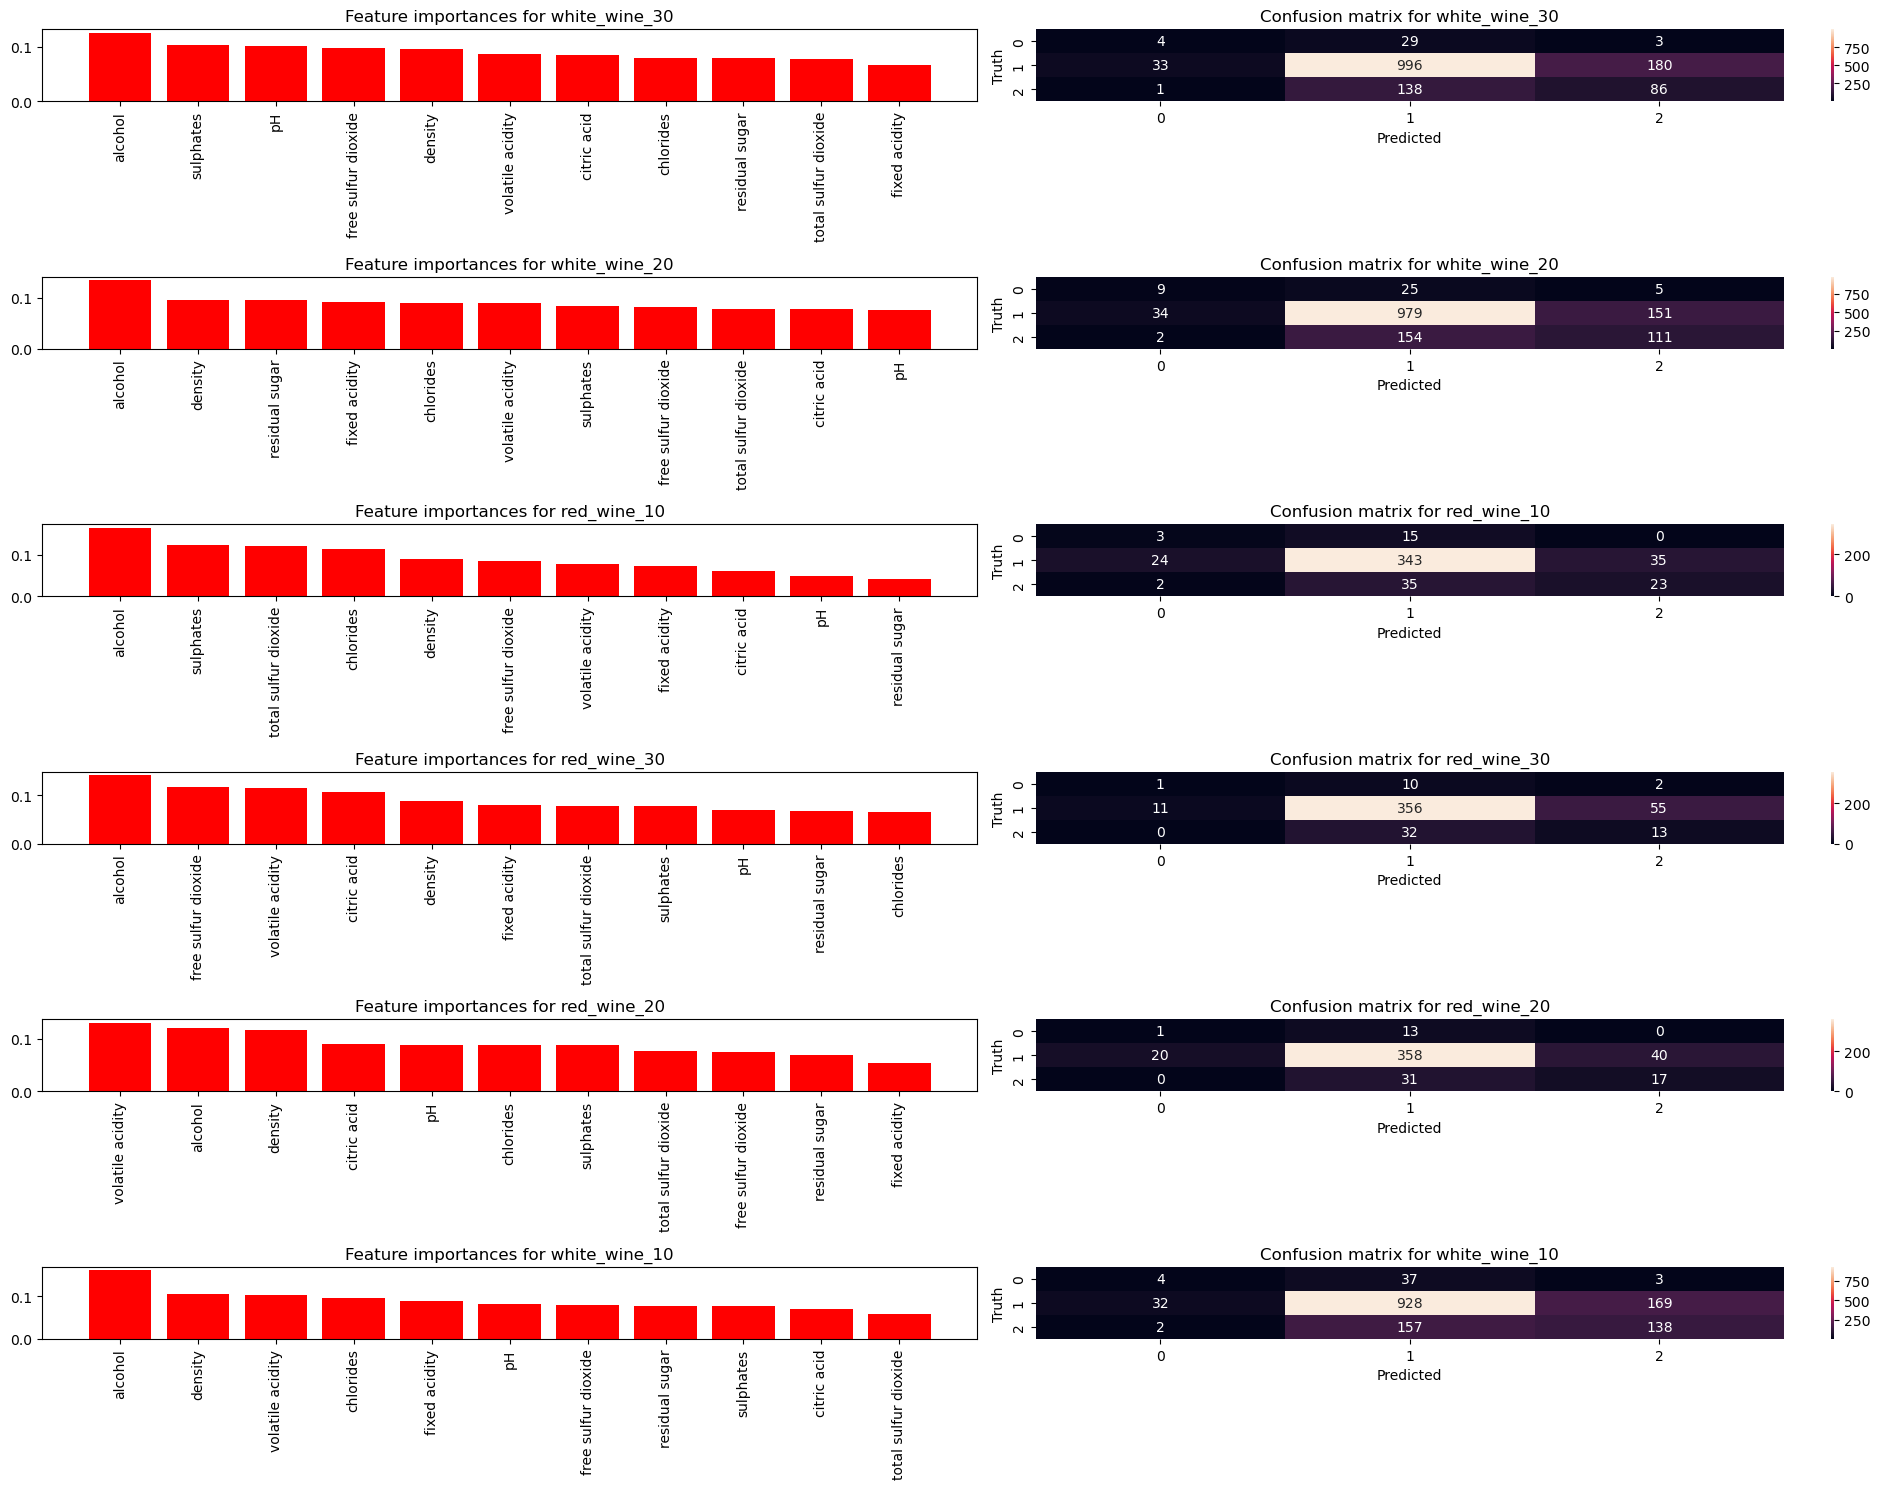

In [18]:
datasets = dh.read_data("data/restored")

fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of Decision Tree on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()

White:
- Accuracy of Decision Tree on white_wine_30: 0.7387755102040816
- Accuracy of Decision Tree on white_wine_20: 0.7476190476190476
- Accuracy of Decision Tree on white_wine_10: 0.7278911564625851

Red:
- Accuracy of Decision Tree on red_wine_30: 0.7708333333333334
- Accuracy of Decision Tree on red_wine_20: 0.7833333333333333
- Accuracy of Decision Tree on red_wine_10: 0.76875

Here diffences are not that big. The accuracy is still high. The classifier is good at predicting the quality of the wine. The model seems to be working well. We still struggle if inbalance of the data, but it is not the problem for that test to solve. 